In [1]:
import LancasterAQ as laq
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_theme(context='paper', style='whitegrid',font='serif',)

In [2]:
data = laq.TabularObject().to_pandas()
data['day_of_week']=pd.Categorical(pd.to_datetime(data['System Time']).dt.day_name(), categories=['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday'], ordered=True)
data['transport_mode'] = data['transport_mode'].str.capitalize()
data.head()


,System Time,lat,lon,ultrafines,transport_mode,log_ultrafines,trip_index,day_of_week
0,2022-05-05 15:53:08,54.008605,-2.788483,6591.0,Driving,8.793612,0,Thursday
1,2022-05-05 15:53:11,54.008605,-2.788483,7095.0,Driving,8.867287,0,Thursday
2,2022-05-05 15:53:12,54.008605,-2.788483,7505.0,Driving,8.923458,0,Thursday
3,2022-05-05 15:53:12,54.008605,-2.788483,7505.0,Driving,8.923458,0,Thursday
4,2022-05-05 15:53:12,54.008605,-2.788483,7505.0,Driving,8.923458,0,Thursday


# Distribution of data 

## Overall

[Text(0.5, 0, 'Ultrafines'), Text(0, 0.5, 'Density')]

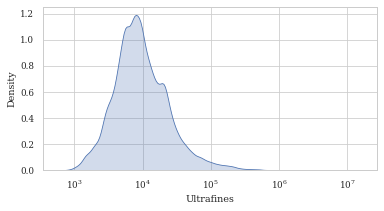

In [3]:
fig, ax = plt.subplots(figsize=(6,3))
sns.kdeplot(x = 'ultrafines', log_scale=True, data=data, shade=True, ax=ax)
ax.set(xlabel = 'Ultrafines', ylabel='Density')

## Split by day 

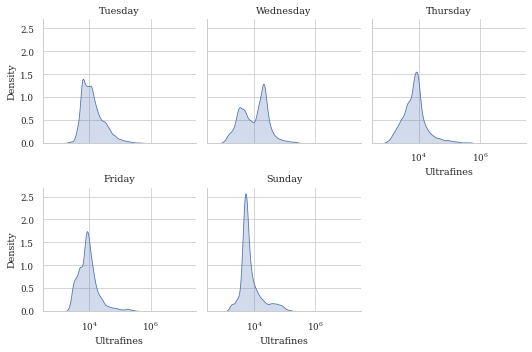

In [4]:
g = sns.FacetGrid(data, col="day_of_week", col_wrap=3, height=2.5)
g.map(sns.kdeplot, "ultrafines", log_scale=True, shade=True)
g.set_titles(col_template="{col_name}")
g.set(xlabel = 'Ultrafines', ylabel='Density')

## Split by Journey

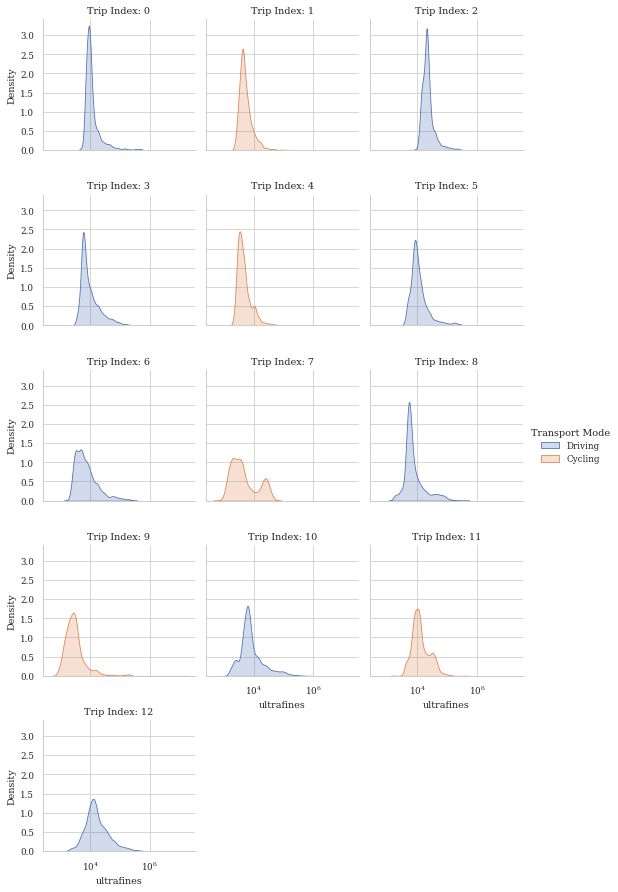

In [5]:
g = sns.FacetGrid(data, col="trip_index", col_wrap=3, height=2.5, hue='transport_mode')
g.map(sns.kdeplot, "ultrafines", log_scale=True, shade=True)
g.add_legend(title='Transport Mode')
g.set_titles(col_template="Trip Index: {col_name}")

### Or as a violin plot...

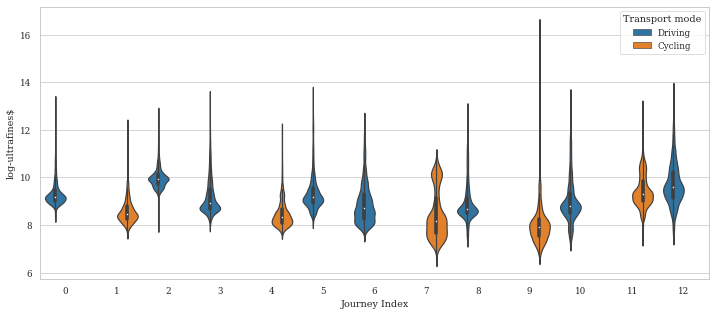

In [6]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.violinplot(y='log_ultrafines', x = 'trip_index', hue='transport_mode', data=data, ax=ax, palette='tab10', scale='width')
ax.set(xlabel = 'Journey Index', ylabel='log-ultrafines$')
ax.get_legend().set_title("Transport mode")

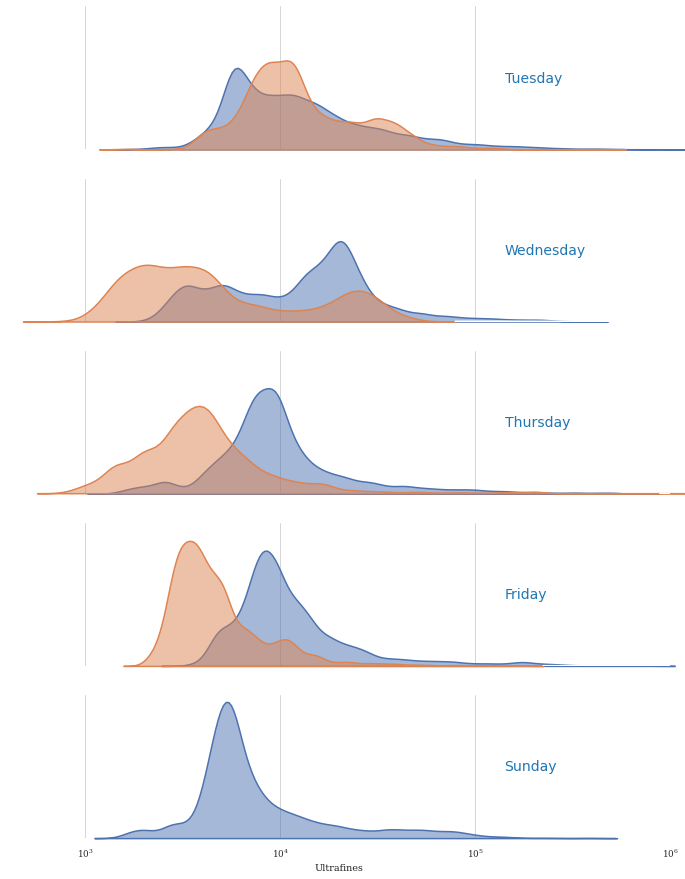

In [7]:
g = sns.FacetGrid(data, row="day_of_week", hue="transport_mode", aspect=4, height=2.5)

g.map(sns.kdeplot, "ultrafines",
      bw_adjust=.85, clip_on=False,
      fill=True, alpha=0.5, linewidth=1.5, log_scale=True)
g.map(sns.kdeplot, "ultrafines", clip=(10**2, 10**6), color="w", lw=2, bw_adjust=.85, log_scale=True)

g.set_titles("")
g.set(yticks=[], ylabel="", xlabel='Ultrafines')
g.despine(bottom=True, left=True)

xlims = g.axes[0][0].get_xlim()
for idx, rn in enumerate(g.row_names):
      ax = g.axes[idx][0]
      ax.text(0.75, 0.5, rn, ha='left', va='center', fontsize=14, transform=ax.transAxes, fontweight='medium', color='tab:blue', fontfamily='sans-serif', fontstretch='extra-expanded')
      ax.set_xlim(10**2.6, 10**6)


# Data size

## By trip

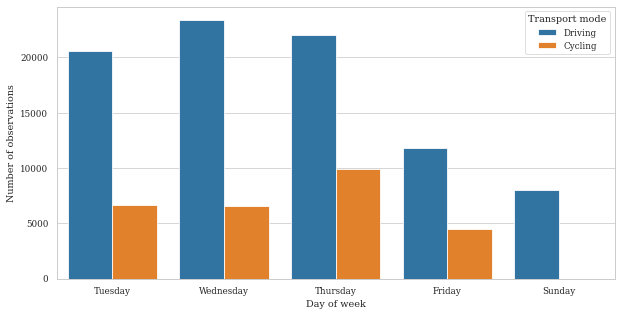

In [8]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=data, x = 'day_of_week', hue='transport_mode', palette='tab10', ax=ax)
ax.set(xlabel = 'Day of week', ylabel='Number of observations')
ax.get_legend().set_title("Transport mode")

## By hour of day

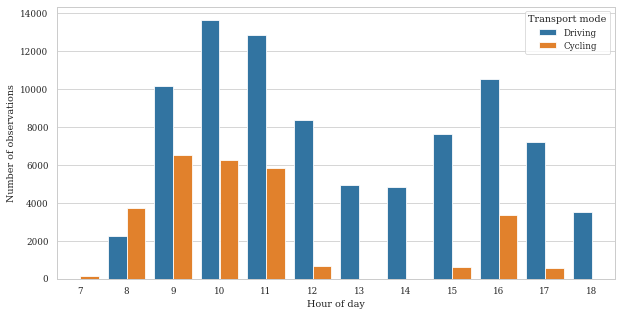

In [9]:
data['hour_of_day']=pd.to_datetime(data['System Time']).dt.hour

fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=data, x = 'hour_of_day', hue='transport_mode', palette='tab10', ax=ax)
ax.set(xlabel = 'Hour of day', ylabel='Number of observations')
ax.get_legend().set_title("Transport mode")